Assignment 1 : 200260002

**Answer 1** : Here I am generating the data matrix using numpy random generator function. 

In [1]:
import numpy as np         #importing numpy

num_of_samples = int(input("Enter the number of samples:"))    #taking input for no. of samples  eg: 500
fd = int(input("Enter the feature dimension:"))                #taking input for no. of feature dimensions    eg: 20

def generate_data_matrix(num_samples, feature_dim):            # Implementing function whuch take two inputs and return matrix output
    return np.random.rand(num_samples, feature_dim)

X = generate_data_matrix(num_of_samples, fd)                   # Taking a counter example
print(X)                                                       #printing the output

Enter the number of samples:500
Enter the feature dimension:20
[[0.0667571  0.12678646 0.58677105 ... 0.13176941 0.00103035 0.11040017]
 [0.39801986 0.98056545 0.15343691 ... 0.72560784 0.66754162 0.7556881 ]
 [0.52554627 0.76756534 0.48314508 ... 0.4176785  0.22468252 0.6123318 ]
 ...
 [0.13216017 0.96118753 0.39388526 ... 0.02874872 0.26550388 0.68812488]
 [0.38440378 0.41486406 0.85749876 ... 0.49355757 0.17395206 0.06181505]
 [0.08171293 0.8709879  0.47002873 ... 0.98158339 0.47876776 0.08268009]]


2**Answer 2** : Function to generate a target vector using input such as data matrix, bias, weights, and noise variance. I am generating the target vector using formula t = X.w + b + noise_variance. And also to generate noise variance in form of gaussian normal distribution, I am using numpy.

In [2]:
import numpy as np

def generate_target_vector(X, weights, bias, noise_var):                                    #function to generate target vector
    t = np.dot(X, weights) + bias + np.random.normal(0, np.sqrt(noise_var), X.shape[0])     # formula for target vector, np.dot is dot multiplication
    return t

# Example usage
# X = np.random.rand(10, 5)
weights = np.random.rand(X.shape[1])                                                       # taking previous X data matrix as input of counter example
bias = 1    # fixing bias to 1
noise_var = 0.1     # taking random noise_variance
t = generate_target_vector(X, weights, bias, noise_var)
# print(t)         # printing the output

**Answer 3** : Computing Linear regression estimate using a simple formula based on Y = mX +c

In [3]:
def lin_reg(Y,weightS_1,bias_1):
  l= np.matmul(Y,weights_1) + bias_1           #np.matmul is the matrix multiplication between two matrix
  return l

Y = np.random.rand(5, 3)                       # generating random data matrix for counter example 
weights_1 = np.random.rand(3)                  # generating random weights of size same as column size of data matrix Y
bias_1 = 0.9                                   # setting bias to a constant value
l=lin_reg(Y,weights_1,bias_1)
print(l)                                       # printing the output vector

[1.09751745 1.39200224 0.95115939 1.26344354 1.23720934]


**Answer 4** :Simple function to compute the mean squared error of two vectors, here I am using the inbuit mse function of scikit-learn for sake of conveniances.

In [4]:
from sklearn.metrics import mean_squared_error                # Importing mse function from sklearn.metrics
def mse(A,B):                                                 #function for calculating the mse
  # Mean Squared Error
  MSE = mean_squared_error(A,B)                               #calling the inbuilt function of sklearn
  return MSE

A = [1,1,2,2,4]                                              #counter examples
# Calculated values
B = [0.6,1.29,1.99,2.69,3.4]  
res = mse(A,B)                                               #output
print(res)

0.21606


**Answer 5**:Function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization, here I am using the formula
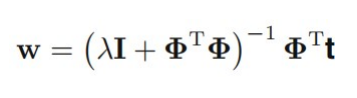

In [5]:
def weight_est(X,t,L=0):                            # Function for weight estimation, also here L=0 is the default value for L2 regularization
  t1=L*np.identity(X.shape[1])                      # here t1,t2,t3 are partwise calculation for the formula and L is the L2 regularization
  t2= np.matmul(X.T,X)                              # X.T is the transpose of X matrix
  t3=np.matmul(X.T,t)
  w = np.matmul(np.linalg.pinv(t1+t2),t3)           # np.linalg.pinv is for pseudo inverse of matrix
  return w

X_2 = np.c_[ X, np.ones(X.shape[0]) ]               # Concatenating the 1s vector to the last column of X_2 for getting biased weight, X.shape[0] is the size of row
L = 1.1                                             # fixing L2 regularization constant to 1.1
w_biased = weight_est(X_2,t,L)
y_5=np.matmul(X_2,w_biased)                         # Calculating the y that is X.w
# print(w_biased)                                   # Output biased weight
# print(mse(y_5,t))                                 # printing MSE of y and target vector 
# print(y_5)                                        # printing the target vector

**Answer 6:** Function to compute the gradient of MSE with respect to its weight vector. I am calculating the gradient by differentiating the MSE formula

In [6]:
def gradient_mse(X, t, w):                         # function for gradient of mse
    y = np.matmul(X, w)                            # this gives X.w
    error = y - t                                  # this is the error calculating using X.w and target vector
    gradient = 2 * np.matmul(X.T, error) / X.shape[0]   # this is formula for gradient of mse
    return gradient
g=gradient_mse(X_2,t,w_biased)
print(g)

[-0.00331983 -0.0007186  -0.00333207 -0.00310438 -0.00213988 -0.00341834
 -0.00147997 -0.00410819  0.00017823 -0.00245849 -0.00141527 -0.00058838
 -0.00231572 -0.00115669 -0.003006   -0.00197996 -0.00295599 -0.00412166
 -0.00168074 -0.0010811  -0.00462168]


**Answer 7**: Function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0.

In [7]:
from numpy.linalg import norm                  #Using numpy to calculate the L2 norm of a vector
def l2_norm(w):
    n = norm(w)                               # norm() is inbuilt function of numpy
    return n-(w[-1])**2                       # here w0 is excluded by subtracting (w[-1])^2
    
w_2=weight_est(X,t,L)                         # Taking example to get w_2 which is unbiased weight
n= l2_norm(w_2)
print(n)

2.8179823894652536


**Answer 8:** Function to compute the gradient of L2 norm with respect to the weight vectors.

In [8]:
def grad_l2(w):                           # Function for gradient of L2 norm
  g = 2*w                                 # differentiating the norm to get 2*w as gradient
  g[-1]=0                                 # gradient with respect to w0 is 0
  return g

g = grad_l2(w_2)
print(g)

[1.68626651 0.46700574 1.76037516 1.65615992 1.20729246 1.75663391
 0.89519365 2.08640958 0.10907666 1.34376329 0.83819965 0.52425116
 1.24562497 0.7411467  1.54561335 1.10749826 1.61525804 1.96063647
 0.94609681 0.        ]


**Answer 9:** Function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0.

In [9]:
def l1_norm(w):                         # Using numpy norm function to calculate L1 norm
    n = norm(w,1)                       # here in norm(w,1) denotes L1 norm
    return n-abs(w[-1])                 # excluding bias w0 by subtracting abs(w[-1])
    
w_2=weight_est(X,t,L)                   # again calling the weight_est() function to generate weight
n_2= l1_norm(w_2)                       # example
print(n_2)

11.746251142112373


**Answer 10:** Function to compute the gradient of L1 norm with respect to the weight vectors.

In [10]:
def grad_l1(w):                         #Function to calculate the gradient of L1 norm
    g = np.sign(w)                      # after differentiating the L1 norm we get signum function, here I'm using signum function directly
    g[-1]=0                             # excluding the bias w0
    return g

g_2 = grad_l1(w_2)
print(g_2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


**Answer 11:** Function for a single update of weights of linear regression using gradient descent.

In [11]:
def update_weights(X, t, w, eta, lambda2=0, lambda1=0):        # Function to update the weight using parameters such as learning rate eta, Lambda1 and lambda2
    y = np.matmul(X, w)
    w = w - eta * (gradient_mse(X,t,w) + lambda2*grad_l2(w) + lambda1*grad_l1(w)) # Directly using gradient_mse and grad_l2 and grad_l1 function to calculate updated w
    return w, mse(y,t)                                         # returning updated weight as well as MSE

eta = 0.05                                                     # Setting eta a smallest value 0.05

uw = update_weights(X_2,t,w_biased,eta,0.1,0.3)                # Example by passing X_2 with bias, t, w_biased, eta, and 0.1 and 0.3 as lambda2 and lambda1 values repectively
print(uw)
# type(uw)

(array([ 0.7321273 ,  0.14672175,  0.7348818 ,  0.68364095,  0.46657929,
        0.75429683,  0.31806671,  0.90954792, -0.0251116 ,  0.53828421,
        0.30350668,  0.11741393,  0.50615349,  0.24531271,  0.66150072,
        0.4305889 ,  0.65024588,  0.91258053,  0.36324972,  0.22830091,
        1.05061197]), 0.09165176344228737)


**Answer 12**: Function to estimate the weights of linear regression using gradient descent.

In [12]:
def estimate_weights(X, t,max_iter, lambda2=0, lambda1=0, eta=0.01, min_change_NRMSE=1e-5):
    # w = weight_est(X,t,lambda2)                                # Use this if want new w 
    w = np.ones(X.shape[1])                                       # using 1s vector for weight for convenience
    nrmse_values = []                                             # array to store nrmse values
    for i in range(int(max_iter)):                                # loop for max iter 
        w, mse_g = update_weights(X, t, w, eta, lambda2, lambda1)   # Calling the above update_weights() function to update weights
        nrmse = np.sqrt(mse_g) / np.std(t)                        # formula to calculate the NRMSE values by dividing the MSE by standard deviation
        nrmse_values.append(nrmse)                                # appending the calculated NRMSE values to the array
        if i > 0 and abs(nrmse_values[-1] - nrmse_values[-2]) < min_change_NRMSE:   # This is checkpoint for max iter is changes is smaller than a certain minimum value
            break                                                   # if the change between the NRMSE values is less than a certain limit then it break the loop
    return w  #, nrmse_values[-1]                                    # for now , I am only returning the updated weight values
# print(estimate_weights(X,t,0,0,0.01,1000,1e-5))                     # printing an example

**EXTRA_WORK**: I am making a function for calculating the NRMSE values

In [13]:
def nrmse_values(X,w,y_val):
  y = np.matmul(X, w)                            # Now we calculating the NRMSE values manually using the formula above in Q12.
  error = y - y_val
  mse_a = np.mean(error ** 2)                              # MSE of validation data
  nrmse = np.sqrt(mse_a) / np.std(y_val)                   # Calculating the NRMSE values 
  return nrmse

**Answer 13a** : Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

a) Training and validation NRMSE obtained using pseudo inverse with number of training samples 

Comments:

1)As the number of training samples increases, the NRMSE may decrease, indicating that the model is better able to fit the data.

2)If there is a large amount of noise or outliers in the data, the NRMSE may remain high even as the number of training samples increases.

3)If the model is not a good fit for the data, the NRMSE may not decrease significantly with an increase in the number of training samples.

4)Other factors such as the quality of the data or the complexity of the model could also affect the relationship between training and validation NRMSE and the number of training samples.

Enter the feature dimension:20


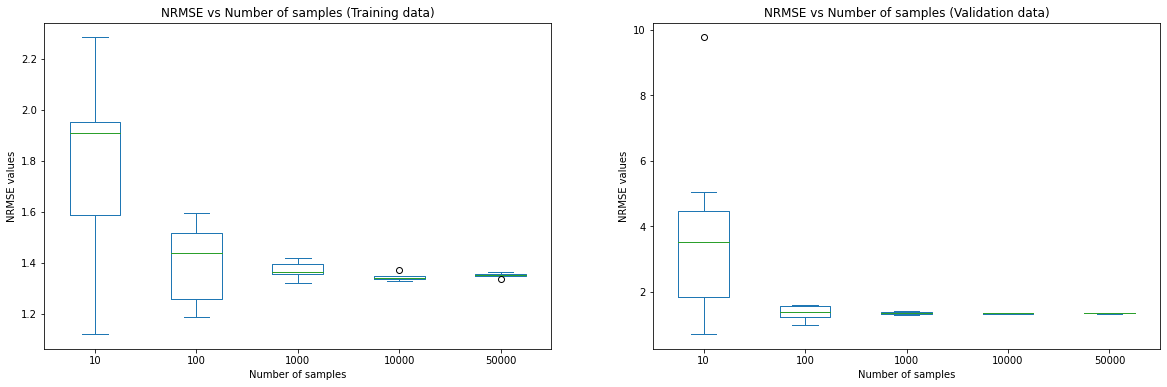

In [14]:
# 13a
from sklearn.model_selection import train_test_split   # Using sklearn library for splitting the data
import matplotlib.pyplot as plt                        # importing the matplotlib for plotting the graph

fd = int(input("Enter the feature dimension:"))        # Taking input for number of feature dimensions

sample_sizes = [10, 100, 1000,10000,50000]             # Setting no. of training sample sizes
rand_seeds = [11,13,15,17,19,21,22]                    # Taking array of random seeds
weights = np.random.rand(fd+1)                         # generating random weights
bias = 1                                               # taking the bias value as 1
noise_var = 0.1                                        # taking the noise var as 0.1

ar_nrmse_tr_a={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_a={}                                      # Dictionary for storing array of validation NRMSE values
for sample_size in sample_sizes:                       # In this loop we will do rest calculation for NRMSE
    n_rmse = []                                        # these are two arrays for storing the NRMSE values of training and validation data
    n_rmse_2 = [] 
    for i in rand_seeds:                               # Implementing loop for random seeds
        np.random.seed(i)                              # planting the seeds
                                    
        data = generate_data_matrix(sample_size, fd)        # generating the data matrix by calling the 1st function
        cdata= np.c_[data, np.ones(data.shape[0]) ]         # Concatenating the 1s vector for bias to the above generated data
        t = generate_target_vector(cdata, weights, bias, noise_var)   # Calling 2nd function to generate target values

        X_train, X_test, y_train, y_test = train_test_split(cdata, t,         # Now splitting the biased data and target data to get training and test data into 80-20%
        test_size=0.2, shuffle = True, random_state = 8)

        # Using the same function above for validation data by splitting the training data which we obtained above.
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
        test_size=0.25, random_state= 8)                                      # 0.25 x 0.8 = 0.2

        w_val = weight_est(X_val,y_val)                          # Calling the weight_est() function to calculate the weight for validation data using pseudo inverse
        nrmse_a=nrmse_values(X_val,weights,y_val)                  # Calling NRMSE calculator function
        n_rmse.append(nrmse_a)                                     # Appending the nrmse values to the above array for validation set

        # Now doing whole above steps again to get the NRMSE values for training data 
        w_tr = weight_est(X_train,y_train)                       # Calling the weight_est() function to calculate the weight for training data using pseudo inverse
        nrmse_2a=nrmse_values(X_train,weights,y_train)            # Calling NRMSE calculator function
        n_rmse_2.append(nrmse_2a)                                 #Appending the nrmse values to the above array for validation set

    ar_nrmse_tr_a[sample_size]=n_rmse_2                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_a[sample_size]=n_rmse                          # Storing the nrmse values for validation data per training sample in dictionary

# print(n_rmse)                                                 # printing the nrmses values
# print(n_rmse_2)
# Creating dataframes
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting
df=pd.DataFrame(ar_nrmse_tr_a)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val=pd.DataFrame(ar_nrmse_val_a)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(20, 6)                                                                   # Size of plots
df.plot(kind='box',ax = axes[0],title="NRMSE vs Number of samples (Training data)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("Number of samples")
axes[0].set_ylabel("NRMSE values")
df_val.plot(kind='box',ax = axes[1],title="NRMSE vs Number of samples (Validation data)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("Number of samples")
axes[1].set_ylabel("NRMSE values")
plt.show()

**Answer 13b:** Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

b) Training and validation NRMSE obtained using pseudo inverse with number of variables

Comments:

1)As the number of variables increases, the NRMSE may decrease if the additional variables are informative and can help improve the model's accuracy.

2)If the additional variables are not informative or are correlated with each other, the NRMSE may not decrease significantly with an increase in the number of variables.

3)If the model is overfitting, the NRMSE may decrease as the number of variables increases but then start to increase as the model becomes too complex.

4)Other factors such as the quality of the data or the complexity of the model could also affect the relationship between training and validation NRMSE and the number of variables.

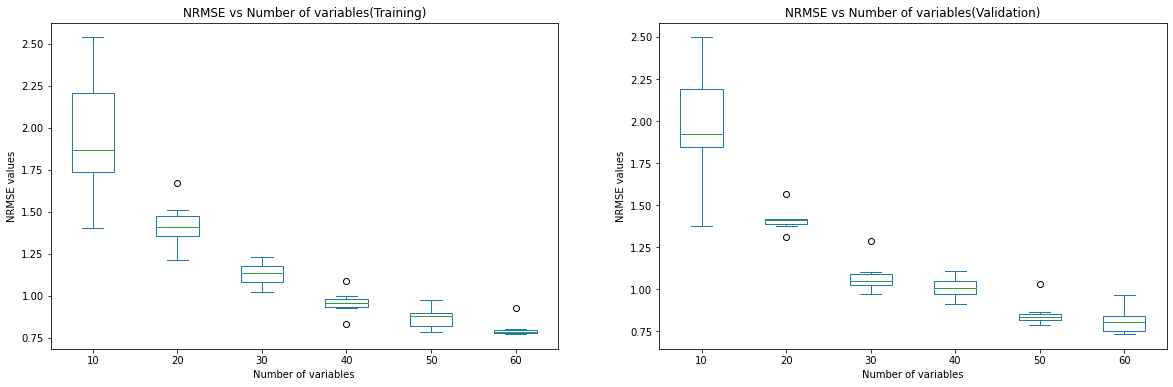

In [15]:
#13b
# In this part all the codes are same with a little changes.
from sklearn.model_selection import train_test_split      # Using sklearn library for splitting the data
import matplotlib.pyplot as plt                           # importing the matplotlib for plotting the graph
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting

fd = [10, 20, 30, 40, 50, 60]                             # Array of number of feature dimensions as variables

rand_seeds = [11,13,15,17,19,21,9]                        # Taking array of random seeds

bias = 1                                                  # setting bias=1, noise_var=0.1
noise_var = 0.1
ar_nrmse_tr_b={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_b={}                                      # Dictionary for storing array of validation NRMSE values
sample_size=1000                                          # Taking sample sizes as 1000
for fds in fd:                                        # In this loop we will do rest calculation for NRMSE by taking different no. of variables
    nrmse_val = []                                            # Arrays to store the nrmses value
    nrmse_tr = []
    for i in rand_seeds:                                      # Implementing loop for random seeds
        np.random.seed(i)                                     # planting the seeds
        weights = np.random.rand(fds+1)                   # generating random weights with extra 1 size for bias
        data = generate_data_matrix(sample_size, fds)     # generating the data matrix by calling the 1st function
        cdata=np.c_[data, np.ones(data.shape[0]) ]        # Concatenating the 1s vector for bias to the above generated data
        t = generate_target_vector(cdata, weights, bias, noise_var)  # Calling 2nd function to generate target values

        X_train, X_test, y_train, y_test = train_test_split(cdata, t,   # Now splitting the biased data and target data to get training and test data into 80-20%
        test_size=0.2, shuffle = True, random_state = 8)

        # Using the same function above for validation data by splitting the training data which we obtained above.
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
        test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

        w_val = weight_est(X_val,y_val)                     # Calling the weight_est() function to calculate the weight for validation data using pseudo inverse
        nrmse_b=nrmse_values(X_val,weights,y_val)                   # Calling NRMSE calculator function
        nrmse_val.append(nrmse_b)                             # Appending the nrmse values to the above array for validation set

        # Now doing whole above steps again to get the NRMSE values for training data 
        w_tr = weight_est(X_train,y_train)                  # Calling the weight_est() function to calculate the weight for training data using pseudo inverse
        nrmse_2_b=nrmse_values(X_train,weights,y_train)            # Calling NRMSE calculator function
        nrmse_tr.append(nrmse_2_b)

    ar_nrmse_tr_b[fds]=nrmse_tr                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_b[fds]=nrmse_val                          # Storing the nrmse values for validation data per training sample in dictionary
# print(nrmse_val)                                                 # printing the nrmses values
# print(nrmse_tr)
# Code for plotting the box plots of nremse values for training and validation sets
df_b=pd.DataFrame(ar_nrmse_tr_b)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_b=pd.DataFrame(ar_nrmse_val_b)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(20, 6)                                                                   # Size of plots
df_b.plot(kind='box',ax = axes[0],title="NRMSE vs Number of variables(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("Number of variables")
axes[0].set_ylabel("NRMSE values")
df_val_b.plot(kind='box',ax = axes[1],title="NRMSE vs Number of variables(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("Number of variables")
axes[1].set_ylabel("NRMSE values")
plt.show()

**Answer 13c:** Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

c) Training and validation NRMSE obtained using pseudo inverse with noise variance

Comments:

1)As the noise variance increases, the NRMSE may increase as the model has a harder time fitting the data due to the added noise.

2)If the model is not a good fit for the data, the NRMSE may not decrease significantly with a decrease in the noise variance.

3)Other factors such as the quality of the data or the complexity of the model could also affect the relationship between training and validation NRMSE and the noise variance.

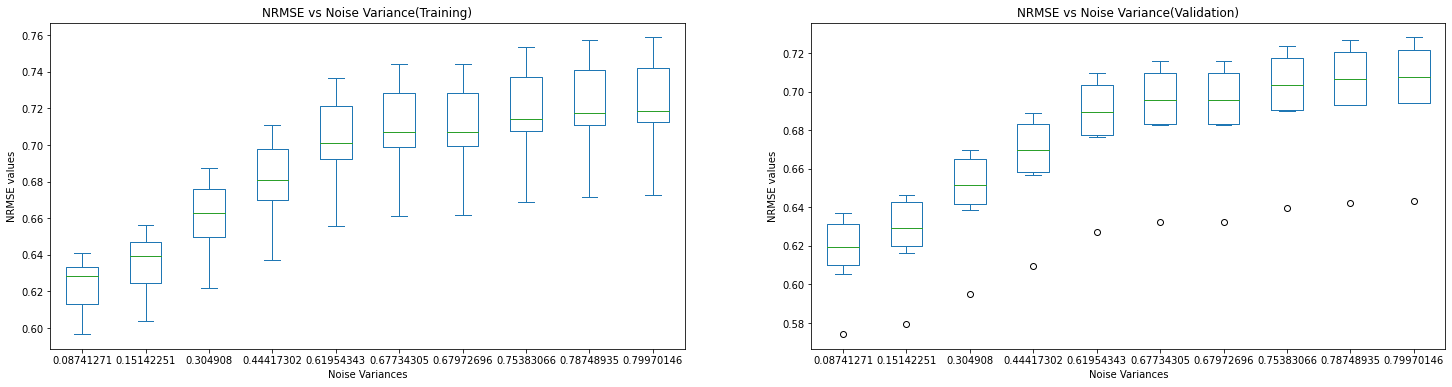

In [16]:
# 13c
# In this part all the codes are same with a little changes.
from sklearn.model_selection import train_test_split      # Using sklearn library for splitting the data
import matplotlib.pyplot as plt                           # importing the matplotlib for plotting the graph
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting

noise_var = [0.08741271,0.15142251,0.304908,0.44417302,0.61954343,0.67734305,0.67972696,0.75383066,0.78748935,0.79970146]  #Arrays of noise_var samples
rand_seeds = [11,13,15,17,19,21,9]                        # Taking array of random seeds
bias = 1                                                  # setting bias=1
sample_size=1000                                          # Taking sample sizes as 1000
fds=100                                                   # Taking feature dimension as 100
weights = np.random.rand(fds+1)                           # generating random weights with extra 1 size for bias
ar_nrmse_tr_c={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_c={}                                      # Dictionary for storing array of validation NRMSE values
for nvs in noise_var:                                 # In this loop we will do rest calculation for NRMSE by taking different no. of noise_var
    nrmse_val_c = []                                          # Arrays to store the nrmses value
    nrmse_tr_c = []
    for i in rand_seeds:                                      # Implementing loop for random seeds
        np.random.seed(i)                                     # planting the seeds
        data = generate_data_matrix(sample_size, fds)     # generating the data matrix by calling the 1st function
        cdata=np.c_[data, np.ones(data.shape[0]) ]        # Concatenating the 1s vector for bias to the above generated data
        t = generate_target_vector(cdata, weights, bias, nvs)  # Calling 2nd function to generate target values
        X_train, X_test, y_train, y_test = train_test_split(cdata,t,   # Now splitting the biased data and target data to get training and test data into 80-20%
        test_size=0.2, shuffle = True, random_state = 8)

        # Using the same function above for validation data by splitting the training data which we obtained above.
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
        test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

        w_val = weight_est(X_val,y_val)                     # Calling the weight_est() function to calculate the weight for validation data using pseudo inverse
        nrmse_c=nrmse_values(X_val,weights,y_val)                   # Calling NRMSE calculator function
        nrmse_val_c.append(nrmse_c)

        w_tr = weight_est(X_train,y_train)
        nrmse_2_c=nrmse_values(X_train,weights,y_train)            # Calling NRMSE calculator function
        nrmse_tr_c.append(nrmse_2_c)
    ar_nrmse_tr_c[nvs]=nrmse_tr_c                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_c[nvs]=nrmse_val_c                          # Storing the nrmse values for validation data per training sample in dictionary
# print(nrmse_val_c)
# print(nrmse_tr_c)
# Code for plotting the box plots of nremse values for training and validation sets
df_c=pd.DataFrame(ar_nrmse_tr_c)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_c=pd.DataFrame(ar_nrmse_val_c)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(25, 6)                                                                   # Size of plots
df_c.plot(kind='box',ax = axes[0],title="NRMSE vs Noise Variance(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("Noise Variances")
axes[0].set_ylabel("NRMSE values")
df_val_c.plot(kind='box',ax = axes[1],title="NRMSE vs Noise Variance(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("Noise Variances")
axes[1].set_ylabel("NRMSE values")
plt.show()

**Answer 13d:** Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

d) Training and validation NRMSE obtained using pseudo inverse with w0

Comments:

1)The NRMSE may decrease as w0 increases, as the model becomes more accurate.

2)The NRMSE may increase as w0 decreases, as the model becomes less accurate.

3)The relationship between NRMSE and w0 may be non-linear and depend on the complexity of the model and the quality of the data.

4)The relationship may also depend on the size of the validation set and the way the validation set is created.

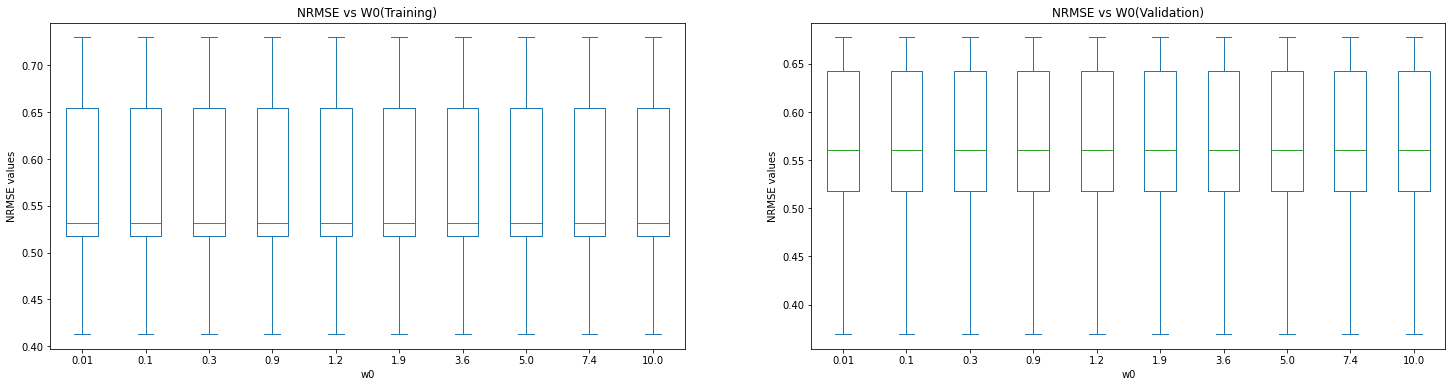

In [17]:
#13d
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt                                 # importing the matplotlib for plotting the graph
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting

rand_seeds = [11,13,15,17,19,21,9]
fds=10
w0_values = [0.01,0.1,0.3,0.9,1.2,1.9,3.6,5,7.4,10]                              # Array of w0 values with size same as feature dimension
bias = 1
noise_var = 0.1
sample_size=1000
ar_nrmse_tr_d={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_d={}                                      # Dictionary for storing array of validation NRMSE values
for w in w0_values:
    nrmse_val_d = []
    nrmse_tr_d = []
    for i in rand_seeds:
        np.random.seed(i)
        weights = np.random.rand(fds)
        n_weights=np.append(weights,w)                  # Appending w0 in the generated weight vector
        data =  np.random.rand(sample_size, fds)
        cdata=np.c_[data, np.ones(data.shape[0]) ]
        t = generate_target_vector(cdata, n_weights, bias, noise_var)
        X_train, X_test, y_train, y_test = train_test_split(cdata, t,
        test_size=0.2, shuffle = True, random_state = 8)

        # Use the same function above for the validation set
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
        test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

        w_val_d = weight_est(X_val,y_val)
        nrmse_d=nrmse_values(X_val,w_val_d,y_val)                   # Calling NRMSE calculator function
        nrmse_val_d.append(nrmse_d)

        w_tr_d = weight_est(X_train,y_train)
        nrmse_2d=nrmse_values(X_train,w_tr_d,y_train)            # Calling NRMSE calculator function
        nrmse_tr_d.append(nrmse_2d)
    ar_nrmse_tr_d[w]=nrmse_tr_d                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_d[w]=nrmse_val_d                          # Storing the nrmse values for validation data per training sample in dictionary
# print(nrmse_val_d)
# print(nrmse_tr_d)
df_d=pd.DataFrame(ar_nrmse_tr_d)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_d=pd.DataFrame(ar_nrmse_val_d)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(25, 6)                                                                   # Size of plots
df_d.plot(kind='box',ax = axes[0],title="NRMSE vs W0(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("w0")
axes[0].set_ylabel("NRMSE values")
df_val_d.plot(kind='box',ax = axes[1],title="NRMSE vs W0(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("w0")
axes[1].set_ylabel("NRMSE values")
plt.show()

**Answer 13e**: Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

e) Training and validation NRMSE obtained using pseudo inverse with lambda2

Comments:

It's important to observe the trends in the NRMSE results as the value of lambda2 changes. As lambda2 increases, the NRMSE for the validation data may decrease if the model is overfitting to the training data. On the other hand, if lambda2 is too large, the model may become underfit and the NRMSE for both the training and validation data may increase.

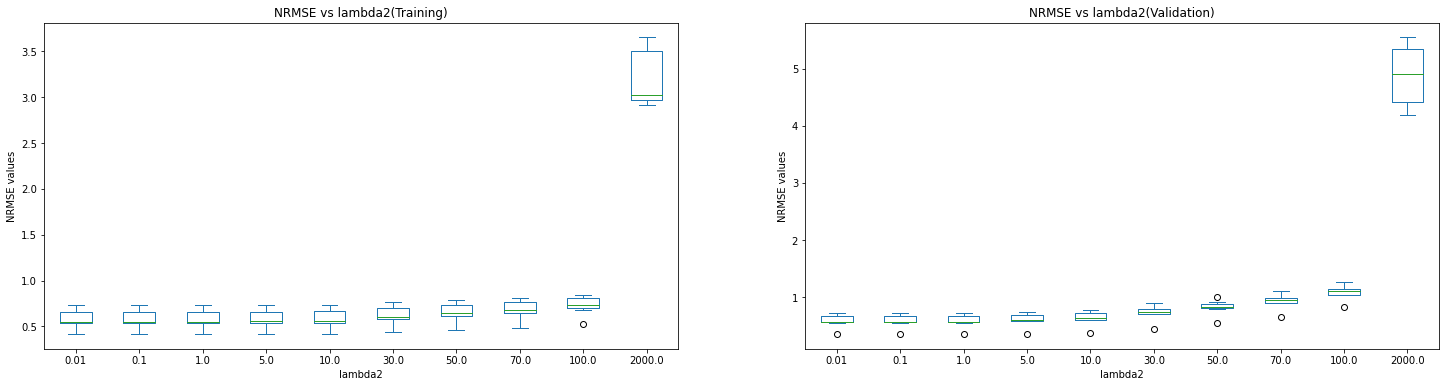

In [18]:
#13e
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt                                 # importing the matplotlib for plotting the graph
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting

rand_seeds = [11,13,15,17,19,21,9]
fds=10
lambda2_values = [0.01,0.1,1,5,10,30,50,70,100,2000]
bias = 1
noise_var = 0.1
ar_nrmse_tr_e={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_e={}                                      # Dictionary for storing array of validation NRMSE values
sample_size=1000
for l in lambda2_values:
    nrmse_val_e = []
    nrmse_tr_e = []
    for i in rand_seeds:
        np.random.seed(i)
        weights = np.random.rand(fds+1)
        data =  np.random.rand(sample_size, fds)
        cdata=np.c_[data, np.ones(data.shape[0]) ]
        t = generate_target_vector(cdata, weights, bias, noise_var)
        X_train, X_test, y_train, y_test = train_test_split(cdata, t,
        test_size=0.2, shuffle = True, random_state = 8)

        # Use the same function above for the validation set
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
        test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

        w_val_e = weight_est(X_val,y_val,l)    #here l is the lambda2 values
        nrmse_e=nrmse_values(X_val,w_val_e,y_val)                   # Calling NRMSE calculator function
        nrmse_val_e.append(nrmse_e)

        w_tr_e = weight_est(X_train,y_train,l)     #here l is the lambda2 values
        nrmse_2e=nrmse_values(X_train,w_tr_e,y_train)            # Calling NRMSE calculator function
        nrmse_tr_e.append(nrmse_2e)
    ar_nrmse_tr_e[l]=nrmse_tr_e                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_e[l]=nrmse_val_e                          # Storing the nrmse values for validation data per training sample in dictionary
# print(nrmse_val_e)
# print(nrmse_tr_e)
df_e=pd.DataFrame(ar_nrmse_tr_e)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_e=pd.DataFrame(ar_nrmse_val_e)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(25, 6)                                                                   # Size of plots
df_e.plot(kind='box',ax = axes[0],title="NRMSE vs lambda2(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("lambda2")
axes[0].set_ylabel("NRMSE values")
df_val_e.plot(kind='box',ax = axes[1],title="NRMSE vs lambda2(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("lambda2")
axes[1].set_ylabel("NRMSE values")
plt.show()

**Answer 13f**: Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points 

Comments:

The time taken to solve the pseudo inverse may increase as the number of samples or variables in the input data increases. This is because the pseudo inverse calculation involves matrix inversion, which can become vast expensive as the size of the input matrix increases.

There may be possibility that there may be breaking points where the time taken to solve the pseudo inverse changes drastically. These breaking points could occur when the size of the input matrix reaches a certain threshold, such as when the matrix becomes singular. In these cases, the calculation of the pseudo inverse may become unstable or may not be possible at all, which could lead to longer computation times or errors in the results.

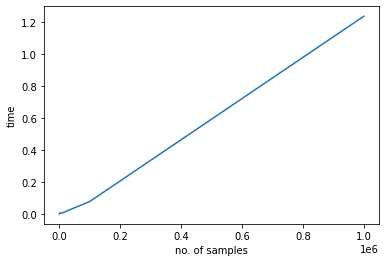

[0.0003905296325683594, 0.00074005126953125, 0.005388975143432617, 0.006899118423461914, 0.0784916877746582, 1.2369427680969238]


In [19]:
# 13f_a
from sklearn.model_selection import train_test_split
from time import time                                           # importing time for calculating the time
import matplotlib.pyplot as plt                                 # importing the matplotlib for plotting the graph
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting

fd = 20
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]    # 100000000 is the breaking point
bias = 1
noise_var = 0.1

times_tr = []                                                     # Creating array to store the time

for sample_size in sample_sizes:
    weights = np.random.rand(fd+1)
    data =  np.random.rand(sample_size, fd)
    cdata=np.c_[data, np.ones(data.shape[0]) ]
    t = generate_target_vector(cdata, weights, bias, noise_var)
    X_train, X_test, y_train, y_test = train_test_split(cdata, t,   # Splitting the data in training and test data
    test_size=0.2, shuffle = True, random_state = 8)

    # Use the same function above for the validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,     #Splitting the training data in validation data
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

    start_time_tr = time()                                                  # starting the timer
    pseudo_inv_tr = np.linalg.pinv(X_train)                                 # calculating the pseudo inverse of training data
    end_time_tr = time()                                                    # ending the timer
    times_tr.append(end_time_tr - start_time_tr)                            # Appending the time to the array

# Plot line plots for sample_size and time taken
xpoints = sample_sizes
ypoints = times_tr

plt.plot(xpoints, ypoints)
plt.xlabel("no. of samples")
plt.ylabel("time")
plt.show()
print(times_tr)

**13-f-b**: Time vs number of variables

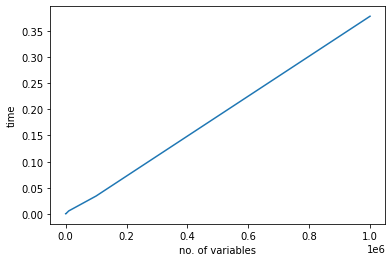

6


In [20]:
# 13f_b
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt                                 # importing the matplotlib for plotting the graph
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting

sample_size = 10
fd = [10, 100, 1000, 10000, 100000, 1000000]            #100000000 is the breaking point
bias = 1
noise_var = 0.1

times_tr_fb = []                                                # Creating array to store the time

for fds in fd:
    weights = np.random.rand(fds+1)
    data =  np.random.rand(sample_size, fds)
    cdata=np.c_[data, np.ones(data.shape[0]) ]
    t = generate_target_vector(cdata, weights, bias, noise_var)
    X_train, X_test, y_train, y_test = train_test_split(cdata, t,   # Splitting the data in training and test data
    test_size=0.2, shuffle = True, random_state = 8)

    # Use the same function above for the validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,     #Splitting the training data in validation data
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

    start_time_tr_fb = time()                                                  # starting the timer
    pseudo_inv_tr_fb = np.linalg.pinv(X_train)                                 # calculating the pseudo inverse of training data
    end_time_tr_fb = time()                                                    # ending the timer
    times_tr_fb.append(end_time_tr_fb - start_time_tr_fb)                            # Appending the time to the array                                                    

# Plot line plots for sample_size and time taken
xpoints = fd
ypoints = times_tr_fb

plt.plot(xpoints, ypoints)
plt.xlabel("no. of variables")
plt.ylabel("time")
plt.show()
print(len(times_tr_fb))

**Answer 13g**: Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

g) Training and validation NRMSE obtained using gradient descent with max_iter:

Comments:

1)NRMSE may decrease as max_iter increases, as the optimization algorithm has more opportunities to refine the model parameters and reduce the error.

2)It is also possible that the NRMSE may reach a minimum value and then start to increase again as max_iter continues to increase.

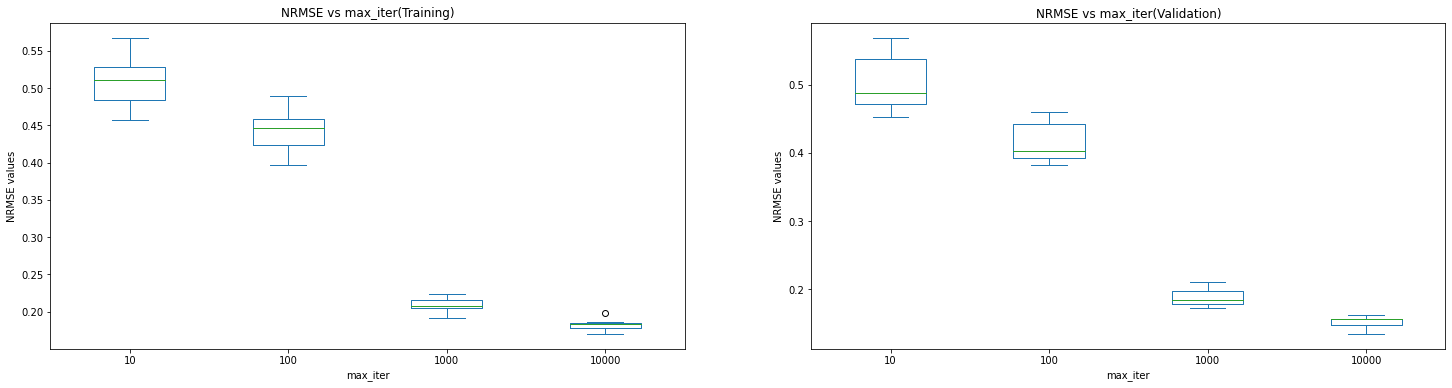

In [21]:
# 13g
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting

iters_g = np.array([10,100,1000,10000])
fds_g=100
bias_g = 1
noise_var_g = 0.1
r_g=[11,13,15,17,19,21,9]
ar_nrmse_tr_g={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_g={}                                      # Dictionary for storing array of validation NRMSE values
for mx_iter_g in iters_g:
    nrmse_val_g = []
    nrmse_tr_g = []
    for rn in r_g:
      np.random.seed(rn)
  
      weights_g = np.random.rand(fds_g+1)
      data_g =  np.random.rand(1000, fds_g)
      cdata_g=np.c_[data_g, np.ones(data_g.shape[0]) ]
      t_g = generate_target_vector(cdata_g, weights_g, bias_g, noise_var_g)
      X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(cdata_g, t_g,
      test_size=0.2, shuffle = True, random_state = 8)
      
      X_train_g, X_val_g, y_train_g, y_val_g = train_test_split(X_train_g, y_train_g, 
        test_size=0.25,shuffle= True, random_state= 8) # 0.25 x 0.8 = 0.2
      
      w_val_g= estimate_weights(X_val_g,y_val_g,mx_iter_g,0,0,0.01)
      nrmse_g=nrmse_values(X_val_g,w_val_g,y_val_g)                   # Calling NRMSE calculator function
      nrmse_val_g.append(nrmse_g)

      
      w_tr_g= estimate_weights(X_train_g,y_train_g,mx_iter_g,0,0,0.01)   
      nrmse2_g=nrmse_values(X_train_g,w_tr_g,y_train_g)            # Calling NRMSE calculator function
      nrmse_tr_g.append(nrmse2_g)
    ar_nrmse_tr_g[mx_iter_g]=nrmse_tr_g                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_g[mx_iter_g]=nrmse_val_g                          # Storing the nrmse values for validation data per training sample in dictionary
# print(nrmse_val_g)
# print(nrmse_tr_g)
df_g=pd.DataFrame(ar_nrmse_tr_g)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_g=pd.DataFrame(ar_nrmse_val_g)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(25, 6)                                                                   # Size of plots
df_g.plot(kind='box',ax = axes[0],title="NRMSE vs max_iter(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("max_iter")
axes[0].set_ylabel("NRMSE values")
df_val_g.plot(kind='box',ax = axes[1],title="NRMSE vs max_iter(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("max_iter")
axes[1].set_ylabel("NRMSE values")
plt.show()

**Answer 13h**: Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

h) Training and validation NRMSE obtained using gradient descent with eta:

Comments:

1)A high eta value may cause the model to converge too quickly to a local minimum, leading to overfitting and high training NRMSE. 

2)A low eta value may cause the model to converge too slowly, leading to underfitting and high validation NRMSE. 

3)The optimal value of eta is one that balances these two trade-offs.

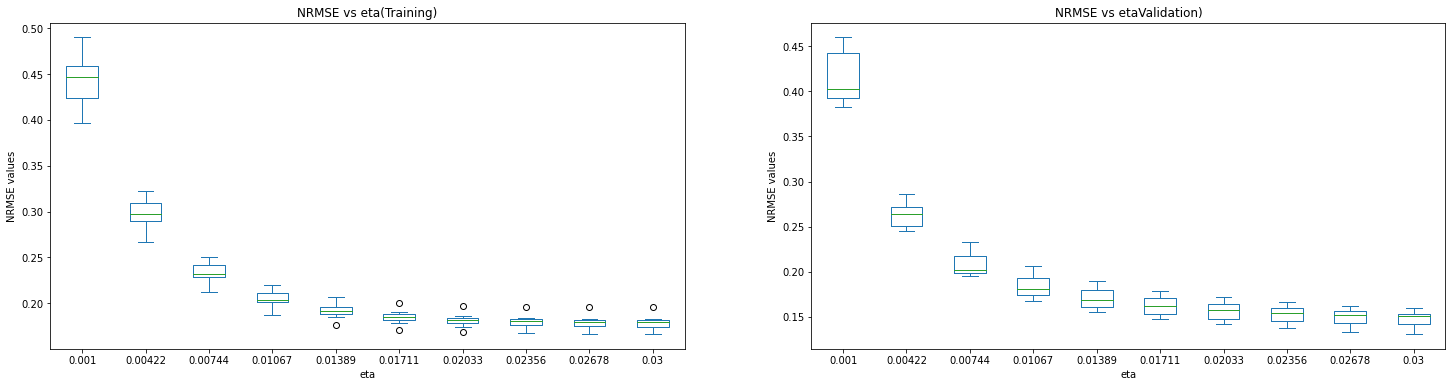

In [25]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting
eta_h=np.linspace(0.001,0.03,10)                                    # taking different eta values between 0 and 0.03
fds=100
bias = 1
noise_var= 0.1
mx_iter=1000                                                    # setting max iter to fixed value 1000
r=[11,13,15,17,19,21,9]
ar_nrmse_tr_h={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_h={}                                      # Dictionary for storing array of validation NRMSE values
for eta in eta_h:
    nrmse_val_h = []
    nrmse_tr_h = []
    for rn in r:
      np.random.seed(rn)
      weights_h = np.random.rand(fds+1)
      data_h =  np.random.rand(1000, fds)
      cdata_h=np.c_[data_h, np.ones(data_h.shape[0]) ]
      t_h = generate_target_vector(cdata_h, weights_h, bias, noise_var)
      X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(cdata_h, t_h,
      test_size=0.2, shuffle = True, random_state = 8)
      X_train_h, X_val_h, y_train_h, y_val_h = train_test_split(X_train_h, y_train_h, 
        test_size=0.25,shuffle= True, random_state= 8) # 0.25 x 0.8 = 0.2
      
      w_val_h= estimate_weights(X_val_h,y_val_h,mx_iter,0,0,eta)
      nrmse_h=nrmse_values(X_val_h,w_val_h,y_val_h)                   # Calling NRMSE calculator function
      nrmse_val_h.append(nrmse_h)

      w_tr_h= estimate_weights(X_train_h,y_train_h,mx_iter,0,0,eta)   
      nrmse2_h=nrmse_values(X_train_h,w_tr_h,y_train_h)            # Calling NRMSE calculator function
      nrmse_tr_h.append(nrmse2_h)
    ar_nrmse_tr_h[round(eta,5)]=nrmse_tr_h                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_h[round(eta,5)]=nrmse_val_h                          # Storing the nrmse values for validation data per training sample in dictionary
# print(nrmse_val_g)
# print(nrmse_tr_g)
df_h=pd.DataFrame(ar_nrmse_tr_h)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_h=pd.DataFrame(ar_nrmse_val_h)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(25, 6)                                                                   # Size of plots
df_h.plot(kind='box',ax = axes[0],title="NRMSE vs eta(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("eta")
axes[0].set_ylabel("NRMSE values")
df_val_h.plot(kind='box',ax = axes[1],title="NRMSE vs etaValidation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("eta")
axes[1].set_ylabel("NRMSE values")
plt.show()

**Answer 13i:** Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points:

Comments:

The time taken to solve gradient descent with the number of samples and number of variables is likely to depend on the efficiency of the implementation, the complexity of the model.

I am getting a linear graph till the breaking points, as my breaking point is order of 10 to the power 8. 

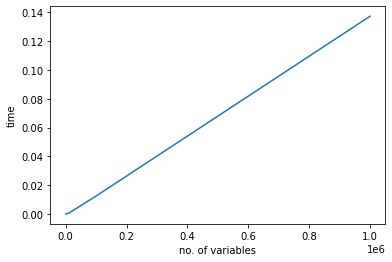

6


In [26]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time

sample_sizes_i = [10, 100, 1000, 10000, 100000, 1000000]    #10000000 is the breaking point

eta=0.03
fds=100
bias = 1
noise_var= 0.1
mx_iter=1000
r=[11,13,15,17,19,21,9]
nrmse_val_i = []
nrmse_tr_i = []
times_i=[]
for sample in sample_sizes_i:
    weights_i = np.random.rand(fds+1)
    data_i =  np.random.rand(sample, fds)
    cdata_i=np.c_[data_i, np.ones(data_i.shape[0]) ]
    t_i = generate_target_vector(cdata_i, weights_i, bias, noise_var)
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(cdata_i, t_i,
    test_size=0.2, shuffle = True, random_state = 8)

    X_train_i, X_val_i, y_train_i, y_val_i = train_test_split(X_train_i, y_train_i, 
      test_size=0.25,shuffle= True, random_state= 8) # 0.25 x 0.8 = 0.2
    
    w_tr_i= estimate_weights(X_train_i,y_train_i,mx_iter,0,0,eta)

    start_time_i = time()
    gd = gradient_mse(X_train_i,y_train_i,w_tr_i) 
    end_time_i = time()
    times_i.append(end_time_i - start_time_i)
# print(nrmse_val_g)
# print(nrmse_tr_g)
# Plot line plots for sample_size and time taken
xpoints = sample_sizes_i
ypoints = times_i

plt.plot(xpoints, ypoints)
plt.xlabel("no. of samples")
plt.ylabel("time")
plt.show()
print(len(times_i))

**Answer 13k:** Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2:

Comments:

1)A higher value of lambda2 leads to stronger regularization, causing a decrease in the training NRMSE, as the model becomes less complex, but also leading to an increase in the validation NRMSE, as the model becomes too simple and underfits the data. 

2)The number of nearly zero weights can be used as a measure of model complexity, and with increasing lambda2, the number of nearly zero weights will increase

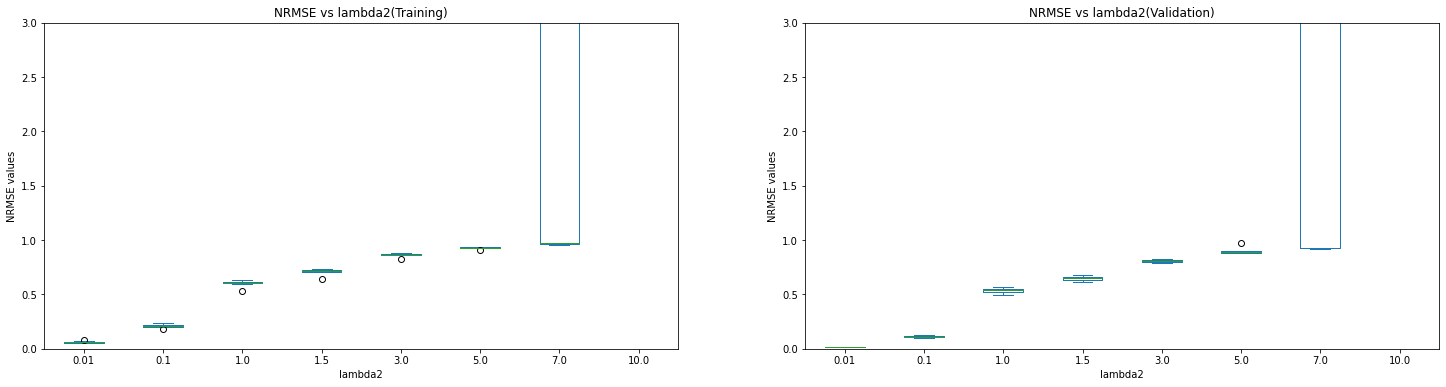

In [34]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting
eta_k=0.03
fds=100
bias = 1
noise_var= 0.1
mx_iter=1000
lambda2_k= [0.01,0.1,1,1.5,3,5,7,10]
r=[11,13,15,17,19,21,9]
ar_nrmse_tr_k={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_k={}                                      # Dictionary for storing array of validation NRMSE values
for l in lambda2_k:
    nrmse_val_k = []
    nrmse_tr_k = []

    for rn in r:
      np.random.seed(rn)
      weights_k = np.random.rand(fds+1)
      data_k =  np.random.rand(100, fds)
      cdata_k=np.c_[data_k, np.ones(data_k.shape[0]) ]
      t_k = generate_target_vector(cdata_k, weights_k, bias, noise_var)
      X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(cdata_k, t_k,
      test_size=0.2, shuffle = True, random_state = 8)

      X_train_k, X_val_k, y_train_k, y_val_k = train_test_split(X_train_k, y_train_k, 
        test_size=0.25,shuffle= True, random_state= 8) # 0.25 x 0.8 = 0.2
      
      w_val_k= estimate_weights(X_val_k,y_val_k,mx_iter,l,0,eta_k)
      nrmse_k=nrmse_values(X_val_k,w_val_k,y_val_k)                   # Calling NRMSE calculator function
      nrmse_val_k.append(nrmse_k)

      
      w_tr_k= estimate_weights(X_train_k,y_train_k,mx_iter,l,0,eta_k)   
      nrmse2_k=nrmse_values(X_train_k,w_tr_k,y_train_k)            # Calling NRMSE calculator function
      nrmse_tr_k.append(nrmse2_k)
    ar_nrmse_tr_k[l]=nrmse_tr_k                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_k[l]=nrmse_val_k                          # Storing the nrmse values for validation data per training sample in dictionary
# print(w_val_k)
# print(w_tr_k)
df_k=pd.DataFrame(ar_nrmse_tr_k)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_k=pd.DataFrame(ar_nrmse_val_k)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(25, 6)                                                                   # Size of plots
df_k.plot(kind='box',ax = axes[0],title="NRMSE vs lambda2(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("lambda2")
axes[0].set_ylabel("NRMSE values")
axes[0].set_ylim(0,3)
df_val_k.plot(kind='box',ax = axes[1],title="NRMSE vs lambda2(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("lambda2")
axes[1].set_ylabel("NRMSE values")
axes[1].set_ylim(0,3)
plt.show()

**Answer 13l:** Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1:

Comments:

1)If lambda1 is set too high, the model may become under-fit

2)Higher value of lambda1, which is a L1 regularization term, will lead to a higher number of nearly zero weights

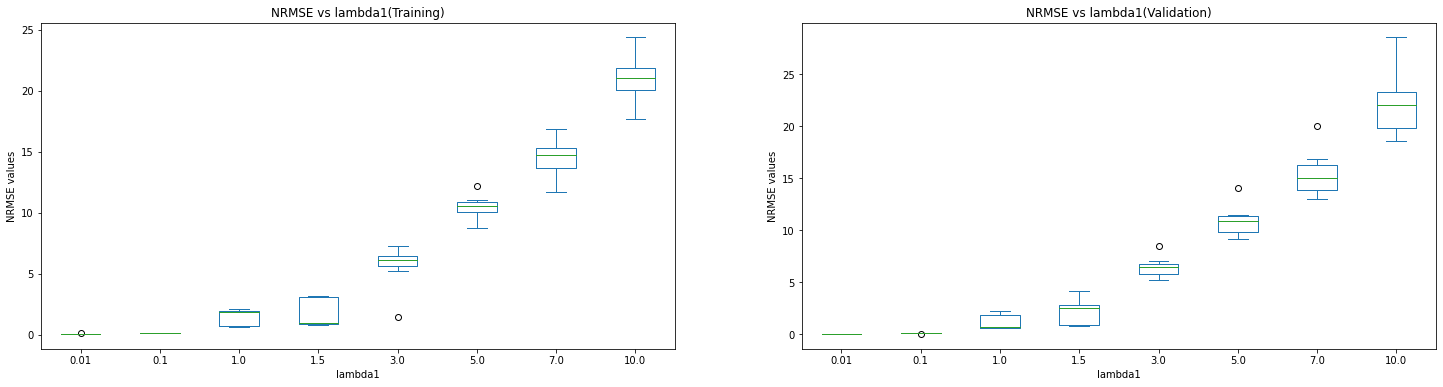

In [35]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting
eta_l=0.03
fds=100
bias = 1
noise_var= 0.1
mx_iter=1000
lambda1_l= [0.01,0.1,1,1.5,3,5,7,10]
r=[11,13,15,17,19,21,9]
ar_nrmse_tr_l={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_l={}                                      # Dictionary for storing array of validation NRMSE values
for l_1 in lambda1_l:
    nrmse_val_l = []
    nrmse_tr_l = []
    for rn in r:
      np.random.seed(rn)
  
      weights_l = np.random.rand(fds+1)
      data_l =  np.random.rand(100, fds)
      cdata_l=np.c_[data_l, np.ones(data_l.shape[0]) ]
      t_l = generate_target_vector(cdata_l, weights_l, bias, noise_var)
      X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(cdata_l, t_l,
      test_size=0.2, shuffle = True, random_state = 8)
      
      X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(X_train_l, y_train_l, 
        test_size=0.25,shuffle= True, random_state= 8) # 0.25 x 0.8 = 0.2
      
      w_val_l= estimate_weights(X_val_l,y_val_l,mx_iter,0.01,l_1,eta_l)
      nrmse_l=nrmse_values(X_val_l,w_val_l,y_val_l)                   # Calling NRMSE calculator function
      nrmse_val_l.append(nrmse_l)

      w_tr_l= estimate_weights(X_train_l,y_train_l,mx_iter,0.01,l_1,eta_l)   
      nrmse2_l=nrmse_values(X_train_l,w_tr_l,y_train_l)            # Calling NRMSE calculator function
      nrmse_tr_l.append(nrmse2_l)
    ar_nrmse_tr_l[l_1]=nrmse_tr_l                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_l[l_1]=nrmse_val_l                          # Storing the nrmse values for validation data per training sample in dictionary
# print(w_val_k)
# print(w_tr_k)
df_l=pd.DataFrame(ar_nrmse_tr_l)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_l=pd.DataFrame(ar_nrmse_val_l)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(25, 6)                                                                   # Size of plots
df_l.plot(kind='box',ax = axes[0],title="NRMSE vs lambda1(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("lambda1")
axes[0].set_ylabel("NRMSE values")
# axes[0].set_ylim(0,3)
df_val_l.plot(kind='box',ax = axes[1],title="NRMSE vs lambda1(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("lambda1")
axes[1].set_ylabel("NRMSE values")
# axes[1].set_ylim(0,3)
plt.show()

**Answer 13m:** Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

m) Training and validation NRMSE for optimal lambda2 with noise variance

Comment:

1)As noise variance increases, it can be expected that the NRMSE would increase as well, as the model struggles to fit the noisy data

2)As the noise variance increases, it becomes more challenging for the model to identify the underlying pattern in the data and make accurate predictions

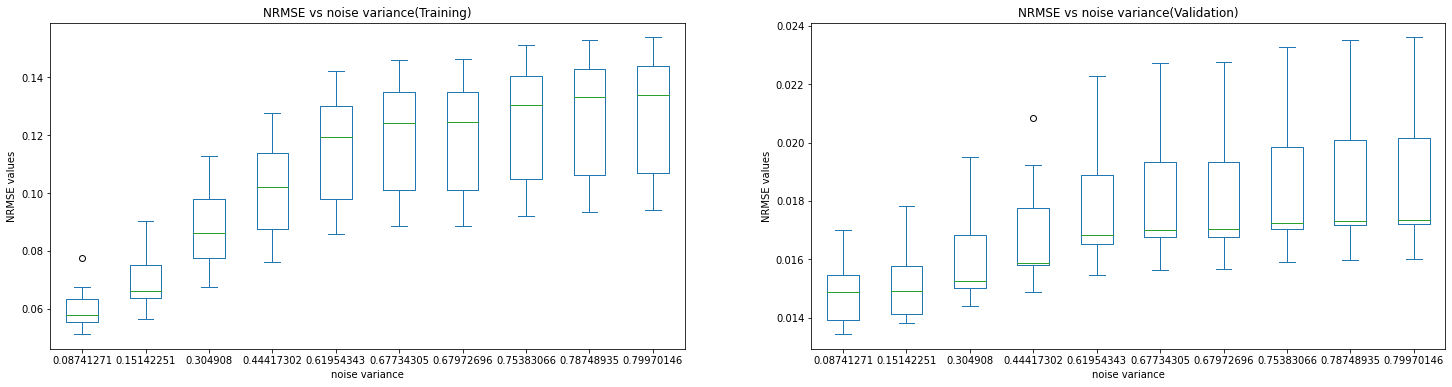

In [36]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting
eta_m=0.03
fds=100
bias = 1
noise_var = [0.08741271,0.15142251,0.304908,0.44417302,0.61954343,0.67734305,0.67972696,0.75383066,0.78748935,0.79970146]  #Arrays of noise_var samples
mx_iter=1000
lambda2_m= 0.01
r=[11,13,15,17,19,21,9]
ar_nrmse_tr_m={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_m={}                                      # Dictionary for storing array of validation NRMSE values
for nv in noise_var:
    nrmse_val_m = []
    nrmse_tr_m = []

    for rn in r:
      np.random.seed(rn)
      weights_m = np.random.rand(fds+1)
      data_m =  np.random.rand(100, fds)
      cdata_m=np.c_[data_m, np.ones(data_m.shape[0]) ]
      t_m = generate_target_vector(cdata_m, weights_m, bias, nv)
      X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(cdata_m, t_m,
      test_size=0.2, shuffle = True, random_state = 8)

      X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_m, y_train_m, 
        test_size=0.25,shuffle= True, random_state= 8) # 0.25 x 0.8 = 0.2
      
      w_val_m= estimate_weights(X_val_m,y_val_m,mx_iter,lambda2_m,0,eta_m)
      nrmse_m=nrmse_values(X_val_m,w_val_m,y_val_m)                   # Calling NRMSE calculator function
      nrmse_val_m.append(nrmse_m)

      w_tr_m= estimate_weights(X_train_m,y_train_m,mx_iter,lambda2_m,0,eta_m)   
      nrmse2_m=nrmse_values(X_train_m,w_tr_m,y_train_m)            # Calling NRMSE calculator function
      nrmse_tr_m.append(nrmse2_m)
    ar_nrmse_tr_m[nv]=nrmse_tr_m                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_m[nv]=nrmse_val_m                          # Storing the nrmse values for validation data per training sample in dictionary
# print(w_val_m)
# print(w_tr_km)
df_m=pd.DataFrame(ar_nrmse_tr_m)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_m=pd.DataFrame(ar_nrmse_val_m)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(25, 6)                                                                   # Size of plots
df_m.plot(kind='box',ax = axes[0],title="NRMSE vs noise variance(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("noise variance")
axes[0].set_ylabel("NRMSE values")
# axes[0].set_ylim(0,3)
df_val_m.plot(kind='box',ax = axes[1],title="NRMSE vs noise variance(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("noise variance")
axes[1].set_ylabel("NRMSE values")
# axes[1].set_ylim(0,3)
plt.show()

Answer 13n: Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:

n) Training and validation NRMSE for optimal lambda1 with noise variance

Comments

1)As the noise variance increases, it becomes harder to find the optimal parameters for the model. This can lead to overfitting to the training data and decreased generalization performance on the validation set.

2)The optimal lambda1 value may not be the same for different levels of noise variance, leading to different results for different levels of noise variance.

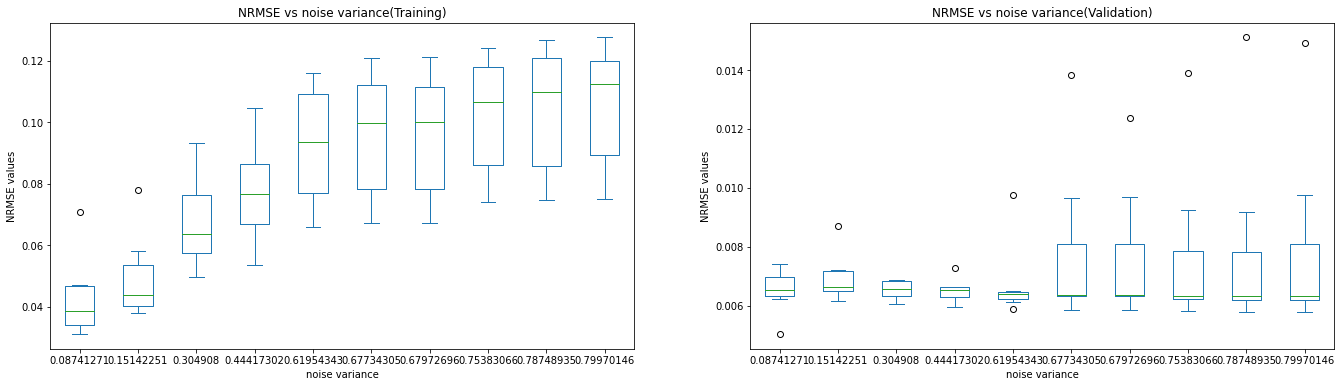

In [38]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd                                             # Importing pandas to create dataframe of NRMSE values per training samples for easy plotting
eta_n=0.03
fds=100
bias = 1
noise_var_n = [0.08741271,0.15142251,0.304908,0.44417302,0.61954343,0.67734305,0.67972696,0.75383066,0.78748935,0.79970146]  #Arrays of noise_var samples
mx_iter=1000
lambda1_n= 0.01
r=[11,13,15,17,19,21,9]
ar_nrmse_tr_n={}                                       # Dictionary for storing array of training NRMSE values
ar_nrmse_val_n={}                                      # Dictionary for storing array of validation NRMSE values
for nv in noise_var_n:
    nrmse_val_n = []
    nrmse_tr_n = []

    for rn in r:
      np.random.seed(rn)
      weights_n = np.random.rand(fds+1)
      data_n =  np.random.rand(100, fds)
      cdata_n=np.c_[data_n, np.ones(data_n.shape[0]) ]
      t_n = generate_target_vector(cdata_n, weights_n, bias, nv)
      X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(cdata_n, t_n,
      test_size=0.2, shuffle = True, random_state = 8)

      X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, 
        test_size=0.25,shuffle= True, random_state= 8) # 0.25 x 0.8 = 0.2
      
      w_val_n= estimate_weights(X_val_n,y_val_n,mx_iter,0,lambda1_n,eta_m)
      nrmse_n=nrmse_values(X_val_n,w_val_n,y_val_n)                   # Calling NRMSE calculator function
      nrmse_val_n.append(nrmse_n)

      w_tr_n= estimate_weights(X_train_n,y_train_n,mx_iter,0,lambda1_n,eta_n)   
      nrmse2_n=nrmse_values(X_train_n,w_tr_n,y_train_n)            # Calling NRMSE calculator function
      nrmse_tr_n.append(nrmse2_n)
    ar_nrmse_tr_n[nv]=nrmse_tr_n                         # Storing the nrmse values for training data per training sample in dictionary
    ar_nrmse_val_n[nv]=nrmse_val_n                          # Storing the nrmse values for validation data per training sample in dictionary
# print(w_val_n)
# print(w_tr_n)
df_n=pd.DataFrame(ar_nrmse_tr_n)                                  # creating dataframe df for dictionary containing training_nrmse values for per training samples
df_val_n=pd.DataFrame(ar_nrmse_val_n)                             # creating dataframe df_val for dictionary containing validation_nrmse values for per training samples

# Code for plotting the box plots of nremse values for training and validation sets
fig1, axes = plt.subplots(nrows=1,ncols=2)                                                    # Setting side by side plots
fig1.set_size_inches(23, 6)                                                                   # Size of plots
df_n.plot(kind='box',ax = axes[0],title="NRMSE vs noise variance(Training)")         # 1st plotting for nrmse values of training dataframe
axes[0].set_xlabel("noise variance")
axes[0].set_ylabel("NRMSE values")
# axes[0].set_ylim(0,3)
df_val_n.plot(kind='box',ax = axes[1],title="NRMSE vs noise variance(Validation)")   # 2nd plotting for nrmse values of validation dataframe
axes[1].set_xlabel("noise variance")
axes[1].set_ylabel("NRMSE values")
# axes[1].set_ylim(0,3)
plt.show()

Answer 14. Write your overall learning points by doing entire assignment. [4 + 2 bonus for diligent work and critical thinking]

According to my learning aspects, I have learnt so many cool things about an important body of ML that is Linear Regression. I loved the implementation for building a linear regression model by myself from scratch. I loved every steps, every implementation of functions, that create a Linear Regression model by coming together. I really enjoyed the coding part, also I have practiced some new stuffs of python, like splitting the data, making dataframe using pandas etc. I understood every steps which take to create the Linear regression model. I am very happy now after completion of this assignment.

**Answer 15.** Quote your references, including roll numbers of fellow students with whom you discussed. Be specific about which part was inspired by what source or which friend.

I have discussed some of the parts of my assignment with my fellow wingmate (200260040). I have discussed the time graph part 13f, and estimation weight part.

For data splitting, I have taken help from Geeks for Geeks.

For pseudo inverse, i have taken help from Numpy documentation.

For plotting the dataframes, I have taken help from Pandas documentation, and Stackoverflow.

MSTeams discussion helps me a lot as initial frame to build a model by myself.